In [ ]:
from functions import *
import pandas as pd
import seaborn as sns
import statistics
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

MODE = 'SSD' # Analysis on 'SSD' or 'HDD' Benchmark Set

GRANULARITY = 5000 # Only work with the last X rows of data sets
blocks = pd.read_csv("./raw_data/{}/data_block.csv".format(MODE), names=["BLOCK", "BLOCK_NS"])

blocks_info = pd.read_csv("./data/enhanced_block.csv", names=["BLOCK", "SIZE", "VERSION", "numberTX", "numberVin", "numberVout", "numberJoinSplit", "numbervShieldedSpend", "numbervShieldedOutput"])

data_inputs = pd.read_csv("./raw_data/{}/data_ecdsa.csv".format(MODE), names=["BLOCK", "NS"])
data_spends = pd.read_csv("./raw_data/{}/data_shieldedSpend.csv".format(MODE), names=["BLOCK", "NS"])
data_outputs = pd.read_csv("./raw_data/{}/data_shieldedOutput.csv".format(MODE), names=["BLOCK", "NS"])
data_joinSplits = pd.read_csv("./raw_data/{}/data_joinsplit.csv".format(MODE), names=["BLOCK", "NS"])

# Clean data
onlyContainingTransparent = blocks_info.loc[(blocks_info['numberJoinSplit'] == 0) & (blocks_info['numbervShieldedSpend'] == 0) & (blocks_info['numbervShieldedOutput'] == 0)]
# Fix Benchmark errors
blocks = blocks[blocks['BLOCK_NS'] < blocks['BLOCK_NS'].quantile(0.99)] # Remove extreme outliers
# data_joinSplits = data_joinSplits[data_joinSplits["NS"] > 100000]
# Make sure no transparent tx was recorded 
data_spends = data_spends[~data_spends['BLOCK'].isin(onlyContainingTransparent['BLOCK'])]
data_outputs = data_outputs[~data_outputs['BLOCK'].isin(onlyContainingTransparent['BLOCK'])]
data_joinSplit = data_joinSplits[~data_joinSplits['BLOCK'].isin(onlyContainingTransparent['BLOCK'])]

# Merge Data
blocks = blocks.merge(blocks_info, how='inner', left_on="BLOCK", right_on="BLOCK")
if GRANULARITY: 
    blocks = blocks.tail(GRANULARITY)

,BLOCK,BLOCK_NS,SIZE,VERSION,numberTX,numberVin,numberVout,numberJoinSplit,numbervShieldedSpend,numbervShieldedOutput
386156,00000000027635165f0de4788290efa7cdd213ac469898...,52223400,13393,4,20,20,57,0,4,5
386072,00000000021e8609fc374f2aa9ca9528f2ce2da5bb4f98...,52231900,12346,4,19,19,59,0,6,3
385730,0000000002ac4213ab6152bc100e7ed475a9868b0c1596...,52288200,10232,4,9,5,66,0,4,4
385764,000000000065dacfe1de184400a0c46e51fa57f89b6363...,52697801,9630,4,12,10,42,0,5,3
386232,000000000115ebb81b37aeafc774bd25b1e3bfc2c81010...,52746300,10691,4,15,20,35,0,7,2
389449,00000000020e132f4317e0a71f1da91c2e079ab2f6859a...,53134701,15326,4,16,20,161,0,0,5
386584,00000000004c28849241542e4d46a137391a904e659dea...,53961501,23074,4,21,54,177,1,3,4
385949,0000000002a8b6a8ca91317d8e8cd18bb5b9524eb22078...,54194300,8979,4,8,5,37,0,6,3
389164,0000000001083d91071b70e004e6a96632ecf82b5df198...,54664001,31455,4,38,118,112,3,2,1
385704,0000000000de24e81f0eef7081db2e1aa8ad144cf6e428...,54932000,16511,4,16,69,37,0,3,2


In [410]:
def model(meNS, meNS_Byte, estimates):
    estimates['KB'] = meNS_Byte * estimates["SIZE"]
    estimates['error_KB'] = estimates['KB'] - estimates["BLOCK_NS"] / estimates['KB']
    print('Median error: ' + str(estimates['error_KB'].median()))
    print('AVG error: ' + str(estimates['error_KB'].mean()))

In [411]:
# k * b
estimates = blocks.copy(deep=True)
meNS = blocks["BLOCK_NS"].median()
meNS_Byte = meNS / blocks["SIZE"].median()
model(meNS, meNS_Byte, estimates)

Median error: 3341399.9609752693
AVG error: 6114285.769803481


In [405]:
meS = data_spends['NS'].tail(GRANULARITY).median()
meO = data_outputs['NS'].tail(GRANULARITY).median()
meJ = data_joinSplits['NS'].tail(GRANULARITY).median()

print(meS)
print(meO)
print(meJ)

5635350.0
5100400.0
5844400.0


In [412]:
def model_improved(kI, kS, kO, kJ, k, estimates):
    estimates['KV'] = estimates['numbervShieldedSpend'] * kS + estimates['numbervShieldedOutput'] * kO + estimates['numberVin'] * kI + estimates['numberJoinSplit'] * kJ + k
    estimates['error_KV'] = estimates['KV'] - estimates["BLOCK_NS"] / estimates['KV']
    print('Median error: ' + str(estimates['error_KV'].median()))
    print('AVG error: ' + str(estimates['error_KV'].mean()))

In [413]:
# k + vi * ki + vs * ks
kI = data_inputs['NS'].median()
kS = meS 
kO = meO
kJ = meJ
k = blocks["SIZE"].median() - (blocks['numberJoinSplit'].median() * kJ + blocks['numbervShieldedSpend'].median() * kS + blocks['numbervShieldedOutput'].median() * kO + blocks['numberVin'].median() * kI)
model_improved(kI, kS, kO, kJ, k, estimates)

Median error: 3716.578020805548
AVG error: 4665920.586339339


In [407]:
melted = pd.melt(estimates.tail(GRANULARITY), id_vars=['SIZE'], value_vars=['KB', 'BLOCK_NS', 'KV'])
melted["value"] = melted["value"] / 1000 # Convert to MS

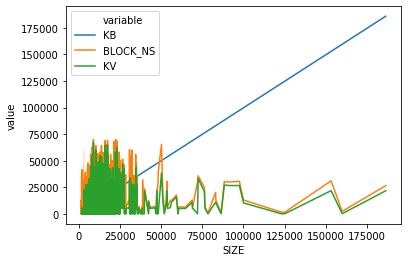

In [408]:
ax = sns.lineplot(data=melted, x="SIZE", y="value", hue="variable", markers=True, dashes=False)

In [399]:
blocks[blocks['SIZE'] > 50000].count()

BLOCK                    33
BLOCK_NS                 33
SIZE                     33
VERSION                  33
numberTX                 33
numberVin                33
numberVout               33
numberJoinSplit          33
numbervShieldedSpend     33
numbervShieldedOutput    33
dtype: int64

In [414]:
# Accurracy Error only for transparent transactions
estimates = blocks.copy(deep=True)
estimates = estimates[estimates['BLOCK'].isin(onlyContainingTransparent['BLOCK'])]
meNS = estimates["BLOCK_NS"].median()
meNS_Byte = meNS / estimates["SIZE"].median()
model(meNS, meNS_Byte, estimates)

Median error: 156332.35441789776
AVG error: 274179.85891648865


In [415]:
kI = data_inputs['NS'].median()
kS = 0
kO = 0
kJ = 0
k = blocks["SIZE"].median() - (blocks['numberJoinSplit'].median() * kJ + blocks['numbervShieldedSpend'].median() * kS + blocks['numbervShieldedOutput'].median() * kO + blocks['numberVin'].median() * kI)
model_improved(kI, kS, kO, kJ, k, estimates)

Median error: 2713.5507457257186
AVG error: 4260.065694451651


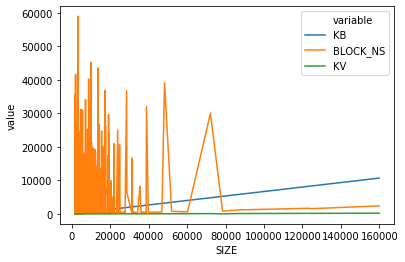

In [416]:
melted = pd.melt(estimates.tail(GRANULARITY), id_vars=['SIZE'], value_vars=['KB', 'BLOCK_NS', 'KV'])
melted["value"] = melted["value"] / 1000 # Convert to MS
ax = sns.lineplot(data=melted, x="SIZE", y="value", hue="variable")

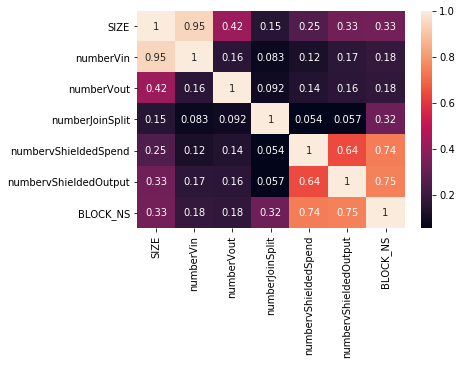

In [401]:
#Correlation
corrMatrix = blocks[["SIZE", "numberVin", "numberVout", "numberJoinSplit", "numbervShieldedSpend", "numbervShieldedOutput", "BLOCK_NS"]].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [402]:
abs(corrMatrix['BLOCK_NS'])

SIZE                     0.334113
numberVin                0.184760
numberVout               0.178608
numberJoinSplit          0.323244
numbervShieldedSpend     0.742684
numbervShieldedOutput    0.750599
BLOCK_NS                 1.000000
Name: BLOCK_NS, dtype: float64

In [403]:
#linear regression
reg = LinearRegression().fit(blocks[["SIZE", "numberVin", "numberVout", "numberJoinSplit", "numbervShieldedSpend", "numbervShieldedOutput"]], blocks['BLOCK_NS'])
reg.get_params()

predict = reg.predict(blocks[["SIZE", "numberVin", "numberVout", "numberJoinSplit", "numbervShieldedSpend", "numbervShieldedOutput"]])

In [404]:
#To retrieve the intercept:
print(reg.intercept_)
#For retrieving the slope:
print(reg.coef_)

2481548.983025551
[-1.43566823e+01  9.97124646e+03  3.17723292e+03  1.41002973e+07
  5.95573199e+06  5.70007068e+06]
